## Linear Descriminant Analysis

#### Linear and Quadratic Discriminant Analysis (LDA and QDA)
* Covered in [Lecture 6](http://youtu.be/qRJ3GKMOFrE) (not assigned, but you should watch if interested.)
* Fit a normal model to each class
    * Assume the same covariance for LDA
        * This makes a linear decision boundary
    * Assume different covariance for QDA
        * This makes a quadratic decision boundary
* Predicted label for new data
    * Pick the label for the more like distribution

The following data, `Pima Indian Diabetes`, can be found at the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes)


### Source:

#### Original Owners:

National Institute of Diabetes and Digestive and Kidney Diseases

#### Donor of database:

Vincent Sigillito (vgs '@' aplcen.apl.jhu.edu)
Research Center, RMI Group Leader
Applied Physics Laboratory
The Johns Hopkins University
Johns Hopkins Road
Laurel, MD 20707
(301) 953-6231

### Data Set Information:

Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage. ADAP is an adaptive learning routine that generates and executes digital analogs of perceptron-like devices. It is a unique algorithm; see the paper for details.

### Attribute Information:

1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)
9. Class variable (0 or 1)

#### ** UPDATE: Until 02/28/2011 this web page indicated that there were no missing values in the dataset. As pointed out by a repository user, this cannot be true: there are zeros in places where they are biologically impossible, such as the blood pressure attribute. It seems very likely that zero values encode missing data. However, since the dataset donors made no such statement we encourage you to use your best judgement and state your assumptions.

In [30]:
import numpy as np
import pylab as pl
import pandas as pd
import sympy as sp
sp.init_printing()

In [31]:
data = pd.read_csv('pima_diabetes.csv')
print data.head(10)

   num_pregnancies  ogtt  blood_pressure  skin_fold  2hour_serum   BMI  \
0                6   148              72         35            0  33.6   
1                1    85              66         29            0  26.6   
2                8   183              64          0            0  23.3   
3                1    89              66         23           94  28.1   
4                0   137              40         35          168  43.1   
5                5   116              74          0            0  25.6   
6                3    78              50         32           88  31.0   
7               10   115               0          0            0  35.3   
8                2   197              70         45          543  30.5   
9                8   125              96          0            0   0.0   

   pedigree  age  class  
0     0.627   50      1  
1     0.351   31      0  
2     0.672   32      1  
3     0.167   21      0  
4     2.288   33      1  
5     0.201   30      0  
6  

In [32]:
xplus = data['ogtt'][data['class'] == 1]
xminus = data['ogtt'][data['class'] == 0]
#The sample means are the means of the respective fitted distributions
plus_mean = xplus.mean()
minus_mean = xminus.mean()
#This is a 1 feature problem, only need to estimate the standard deviation
#For LDA, we combine the data to estimate the SD (assumption is that sigma+ = sigma-
sigma = data['ogtt'].std()

In [33]:
#Define the gaussian pdf for a univariate distribution
from math import sqrt,pi
def one_var_gaussian(x_array, mu, sigma):
    return (1.0)/(sigma*sqrt(2*pi))*np.exp(-1/(2*sigma**2)*(x_array-mu)**2)


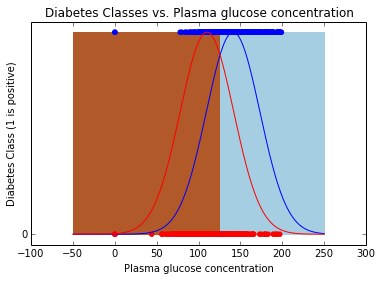

In [34]:
#Get the curve for both classes
xplot = np.linspace(-50,250,1000)
#We fit a normal model for each class separately
#For LDA, use the same sigma
yplus = one_var_gaussian(xplot, plus_mean, sigma)
yminus = one_var_gaussian(xplot, minus_mean, sigma)
#Get the max height for graphing
h = max(yplus.max(), yminus.max())
h
#
#Plot background color for each predicited class
#
x_grid = np.linspace(-50, 250, 100)
y_grid = np.linspace(0, h, 100)
xx, yy = np.meshgrid(x_grid, y_grid)
density_plus = one_var_gaussian(xx.ravel(), plus_mean, sigma)
density_minus = one_var_gaussian(xx.ravel(), minus_mean, sigma)
#
#The predicted label is 1 iif plus_density >= minus_density
#
Z = np.array([1 if yp <= ym else 0 for yp, ym in zip(density_plus, density_minus)])
Z = Z.reshape(xx.shape)
pl.pcolormesh(xx, yy, Z, cmap=pl.cm.Paired)
#
# Plot the points
#
x1 = data['ogtt']
y = data['class']*h
class_color = ['blue' if check else 'red' for check in data['class'] == 1]
pl.scatter(x1, y, color = class_color)
pl.title("Diabetes Classes vs. Plasma glucose concentration")
pl.ylabel("Diabetes Class (1 is positive)")
pl.xlabel("Plasma glucose concentration")
pl.yticks([0,1])
#
#Plot the normal curve for each model
#
pl.plot(xplot, yplus, color='blue')
pl.plot(xplot, yminus, color='red')

## Summary of LDA
 - Use group means for each $\mu_i$
 - **Use the overall $\sigma$ for each model**
 - Pick class based on most likely model
 - Decision boundary is where one model becomes more likely

In [35]:
#For QDA, we fit a different sigma to each distribution
plus_sigma = xplus.std()
minus_sigma = xminus.std()
yplus = one_var_gaussian(xplot, plus_mean,plus_sigma)
yminus = one_var_gaussian(xplot, minus_mean, minus_sigma)
h = max(yplus.max(), yminus.max())
h

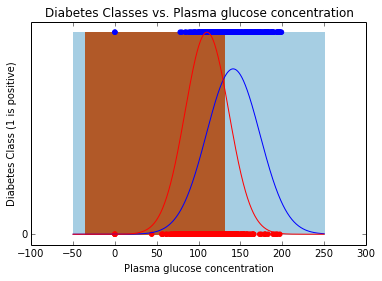

In [36]:
#
#Plot background color for each predicited class
#
x_grid = np.linspace(-50, 250, 100)
y_grid = np.linspace(0, h, 100)
xx, yy = np.meshgrid(x_grid, y_grid)
density_plus = one_var_gaussian(xx.ravel(), plus_mean, plus_sigma)
density_minus = one_var_gaussian(xx.ravel(), minus_mean, minus_sigma)
#
#The predicted label is 1 iif plus_density >= minus_density
#
Z = np.array([1 if yp <= ym else 0 for yp, ym in zip(density_plus, density_minus)])
Z = Z.reshape(xx.shape)
pl.pcolormesh(xx, yy, Z, cmap=pl.cm.Paired)
#
# Plot the points for each class
#
x1 = data['ogtt']
y = data['class']*h
class_color = ['blue' if check else 'red' for check in data['class'] == 1]
pl.scatter(x1, y, color = class_color)
pl.title("Diabetes Classes vs. Plasma glucose concentration")
pl.ylabel("Diabetes Class (1 is positive)")
pl.xlabel("Plasma glucose concentration")
pl.yticks([0,1])
#
# Plot the density curves for each class
#
pl.plot(xplot, yplus, color='blue')
pl.plot(xplot, yminus, color='red')

## Summary of QDA
 - Use group means for each $\mu_i$
 - **Use group SD for each $\sigma_i$**
 - Pick class based on most likely model
 - Decision boundary is where one model becomes more likely

### Using `sklearn` to Fit and Plot Linear Discriminant Analysis: One Feature

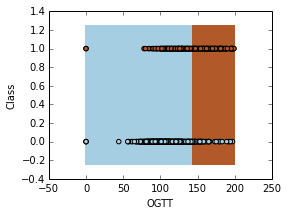

In [37]:
from sklearn.lda import LDA
# We need the X matrix to be 2D, but DON'T need to include a column of 1's
X = data[['ogtt']]
# The Y vector must be 1D
Y = data['class']

##############################
### 1. Make a model object ###
##############################

lda = LDA()

#########################
### 2. Fit the model  ###
#########################

# we create an instance of Neighbours Classifier and fit the data.
lda.fit(X, Y)

###################################
### 3. Use the model to predict ###
###################################

# Plot the decision boundary. For that, we will asign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X.min()[0] - .5, X.max()[0] + .5
y_min, y_max = -0.25, 1.25
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = lda.predict(np.c_[xx.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
pl.figure(1, figsize=(4, 3))
pl.pcolormesh(xx, yy, Z, cmap=pl.cm.Paired)

# Plot also the training points
pl.scatter(X['ogtt'], Y , c=Y, edgecolors='k', cmap=pl.cm.Paired)
pl.xlabel('OGTT')
pl.ylabel('Class')

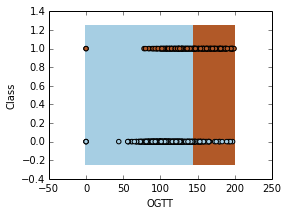

In [38]:
from sklearn.qda import QDA
# We need the X matrix to be 2D, but DON'T need to include a column of 1's
X = data[['ogtt']]
# The Y vector must be 1D
Y = data['class']

qda = QDA()

# we create an instance of Neighbours Classifier and fit the data.
qda.fit(X, Y)


# Plot the decision boundary. For that, we will asign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X.min()[0] - .5, X.max()[0] + .5
y_min, y_max = -0.25, 1.25
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = qda.predict(np.c_[xx.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
pl.figure(1, figsize=(4, 3))
pl.pcolormesh(xx, yy, Z, cmap=pl.cm.Paired)

# Plot also the training points
pl.scatter(X['ogtt'], Y , c=Y, edgecolors='k', cmap=pl.cm.Paired)
pl.xlabel('OGTT')
pl.ylabel('Class')

<STYLE>H1 {FONT-SIZE: 21pt; COLOR:red}</STYLE>
<H1>Homework Exercise 1</H1>

1. Fit and plot the decision regions for LDA and QDA using BMI as the only feature.
2. Fit and plot the decision regions for LDA and QDA for three other individual features.

### Using `sklearn` to Fit and Plot Logistic Regression: Two Features

Now let's fit two features, OGTT and BMI

#### LDA

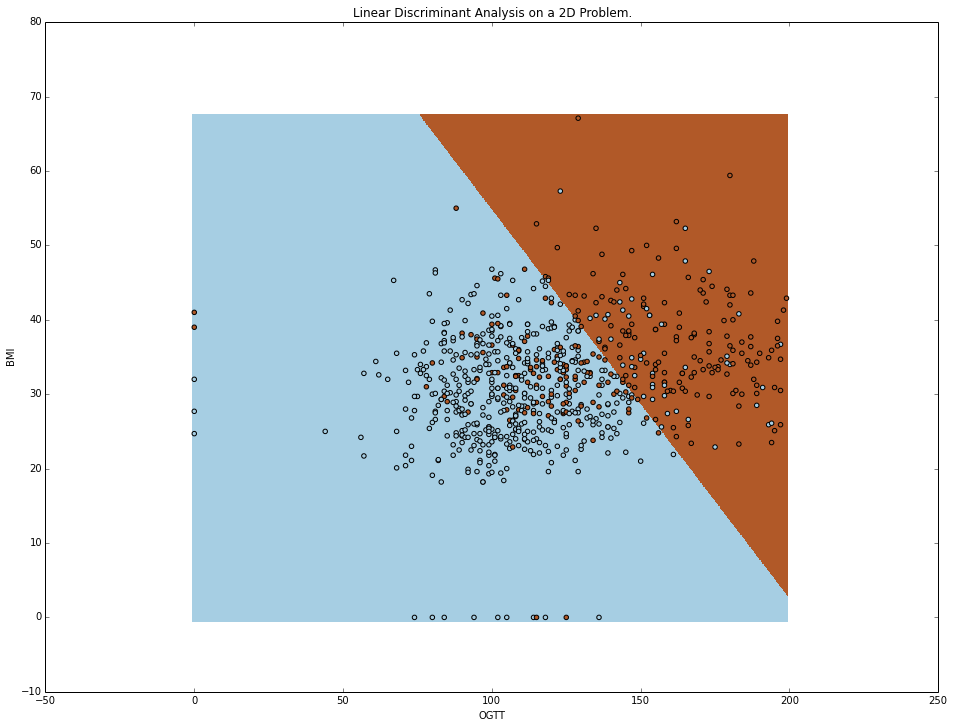

In [39]:
import numpy as np
import pylab as pl
from sklearn.lda import LDA

# We need the X matrix to be 2D, but DON'T need to include a column of 1's
X = data[['ogtt','BMI']]
# The Y vector must be 1D
Y = data['class']

lda = LDA()

# we create an instance of Neighbours Classifier and fit the data.
lda.fit(X, Y)

# Plot the decision boundary. For that, we will asign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X.min()[0] - .5, X.max()[0] + .5
y_min, y_max = X.min()[1] - .5, X.max()[1] + .5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))
Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
pl.figure(1, figsize=(16, 12))
pl.pcolormesh(xx, yy, Z, cmap=pl.cm.Paired)

# Plot also the training points
pl.scatter(X['ogtt'], X['BMI'], c=Y, edgecolors='k', cmap=pl.cm.Paired)
pl.xlabel('OGTT')
pl.ylabel('BMI')
pl.title("Linear Discriminant Analysis on a 2D Problem.")

### QDA

Now we use QDA, where the covariance can be different for the different classes.  This results in a quadratic boundary.

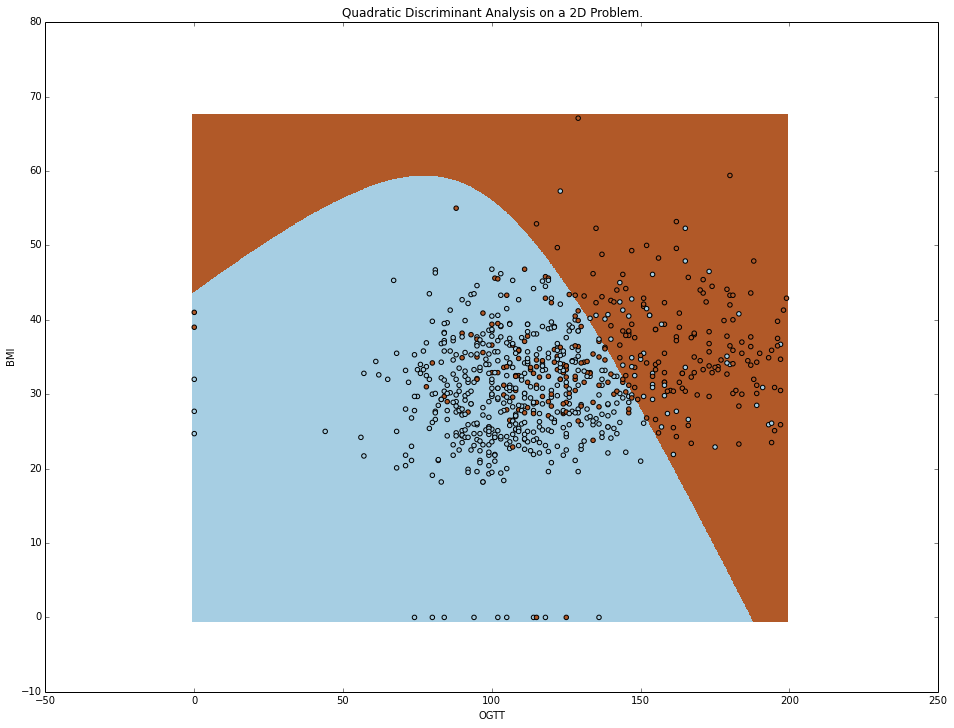

In [40]:
import numpy as np
import pylab as pl
from sklearn.qda import QDA

# We need the X matrix to be 2D, but DON'T need to include a column of 1's
X = data[['ogtt','BMI']]
# The Y vector must be 1D
Y = data['class']

qda = QDA()

# we create an instance of Neighbours Classifier and fit the data.
qda.fit(X, Y)

# Plot the decision boundary. For that, we will asign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X.min()[0] - .5, X.max()[0] + .5
y_min, y_max = X.min()[1] - .5, X.max()[1] + .5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))
Z = qda.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
pl.figure(1, figsize=(16, 12))
pl.pcolormesh(xx, yy, Z, cmap=pl.cm.Paired)

# Plot also the training points
pl.scatter(X['ogtt'], X['BMI'], c=Y, edgecolors='k', cmap=pl.cm.Paired)
pl.xlabel('OGTT')
pl.ylabel('BMI')
pl.title("Quadratic Discriminant Analysis on a 2D Problem.")

<STYLE>H1 {FONT-SIZE: 21pt; COLOR:red}</STYLE>
<H1>Homework Exercise 2</H1>

1. Fit and plot the decision regions for LDA and QDA using BMI and blood pressure as the only features.
2. Fit and plot the decision regions for LDA and QDA for three more pairs of features.

### Visualize the Distributions for Each Class

To illustrate how LDA works, we will plot the density curves for each class using the following steps.

1. Estimate the mean vector and covariance matrix
2. Use `sympy` to compute a formula for each density
3. Plot the densities


####Compute the estimates of the means

Each $\vec{x}$ is a vector that contains the OGTT and BMI data as components.  We can average vectors in the same way as regular numbers.  Note that averaging vectors will average all the entries.

$$ \vec{\mu}\_{plus} = \frac{\sum_{i=1}^{m} \vec{x}\_{plus}}{n_{plus}} = \left( \begin{array}{cc} \bar{x}\_{OGTT+}\\\ \bar{x}\_{BMI+} \end{array} \right) $$

and

$$ \vec{\mu}\_{minus} = \frac{\sum_{i=1}^{m} \vec{x}\_{minus}}{n_{minus}} = \left( \begin{array}{cc} \bar{x}\_{OGTT-}\\\ \bar{x}\_{BMI-} \end{array} \right) $$

In [41]:
#Compute the means 
plus_mean_vector = np.matrix([[data.ogtt[data['class'] == 1].mean()],[data.BMI[data['class'] == 1].mean()]])
minus_mean_vector = np.matrix([[data.ogtt[data['class'] == 0].mean()],[data.BMI[data['class'] == 0].mean()]])

#### Estimating the Variance-Covariance Matrix

When dealing with random vectors, the generalization of variance is the variance-covariance matrix defined as $\Sigma = E\left( \left( \vec{x} - \vec{\mu}\right)\left( \vec{x} - \vec{\mu}\right)^T\right)$ which contains the individual variances for $x_i$ on the diagonal and the covariances between $x_i$ and $x_j$ on the $i,j^{th}$ off-diagonal entry.  This matrix is sometimes simply refered to as the covariance matrix.


The formula for estimating the covariance matrix is given by

$$ \mathbf{Q} = {1 \over {n-1}}\sum_{i=1}^n (\vec{x}_i-\overline{x})(\vec{x}_i-\overline{x})^\mathrm{T} $$

Recall that we are combining the two classes into one covariance estimate for LDA.

In [42]:
#Make a container for the x vectors
x_vectors = [np.asmatrix(row).T for row in np.asmatrix(X)]
#a container that has the correct mean for each x vector taking advantage of y==1 <-> y==True and y==0 <-> y==False in python
means = [plus_mean_vector if y==1 else minus_mean_vector for y in Y]
n = len(means)
#Make a zero matrix to store the covariance estimate
covar = np.matrix([[0.0,0.0],[0.0,0.0]])
for x_vec, mean_vec in zip(x_vectors, means):
    covar += (1.0)/(n - 1.0)*(x_vec - mean_vec)*(x_vec - mean_vec).T
covar

matrix([[ 799.70669501,   21.30183432],
        [  21.30183432,   56.83472784]])

#### The multvariate Gaussian distribution

The formula for the multivariate normal distribution with mean vector $\vec{\mu}$ and covariance matrix $\Sigma$ is given by

$$ f\left(\vec{x}\right) = \frac{1}{\left(2\pi\right)^{n/2}\left|\Sigma\right|^{1/2}} e^{-\frac{1}{2}\left(\vec{x}-\vec{\mu}\right)^T\Sigma^{-1}\left(\vec{x}-\vec{\mu}\right)} $$

Here is an image of the marginal distributions and a contour for the multivariate normal (found on [wikipedia](http://en.wikipedia.org/wiki/Multivariate_normal_distribution).)

![Multivariate Normal](http://upload.wikimedia.org/wikipedia/commons/thumb/8/8e/MultivariateNormal.png/793px-MultivariateNormal.png)

We will use `sympy` to make a formula for this density and use it to plot the density for each class.

Code for the multivariate normal found at [Stack Overflow](http://stackoverflow.com/questions/11615664/multivariate-normal-density-in-python)

The code was refactored to work on numpy column matrices.

In [48]:
help(multivariate_normal)

Help on built-in function multivariate_normal:

multivariate_normal(...)
    multivariate_normal(mean, cov[, size])
    
    Draw random samples from a multivariate normal distribution.
    
    The multivariate normal, multinormal or Gaussian distribution is a
    generalization of the one-dimensional normal distribution to higher
    dimensions.  Such a distribution is specified by its mean and
    covariance matrix.  These parameters are analogous to the mean
    (average or "center") and variance (standard deviation, or "width,"
    squared) of the one-dimensional normal distribution.
    
    Parameters
    ----------
    mean : 1-D array_like, of length N
        Mean of the N-dimensional distribution.
    cov : 2-D array_like, of shape (N, N)
        Covariance matrix of the distribution.  Must be symmetric and
        positive semi-definite for "physically meaningful" results.
    size : tuple of ints, optional
        Given a shape of, for example, ``(m,n,k)``, ``m*n*k`` sampl

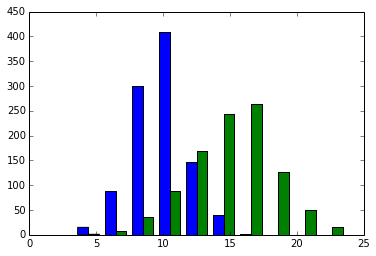

In [44]:
import numpy as np
import math
# covariance matrix
sigma = np.matrix([[4, -3],[-3, 9]])
# mean vector
mu = np.matrix([[10],[15]])



def norm_pdf_multivariate(x, mu, sigma):
    size = len(x)
    if size == len(mu) and (size, size) == sigma.shape:
        det = np.linalg.det(sigma)
        if det == 0:
            raise NameError("The covariance matrix can't be singular")
        norm_const = 1.0/ ( math.pow((2*pi),float(size)/2) * math.pow(det,1.0/2) )
        x_mu = np.matrix(x - mu)
        inv = sigma.I
        result = math.pow(math.e, -0.5 * (x_mu.T * inv * x_mu))
        return norm_const * result
    else:
        raise NameError("The dimensions of the input don't match")
sample = multivariate_normal(np.array(mu)[:,0],sigma,1000)
pl.hist(sample)
# input
xgrid = np.linspace(mu[0,0] - 3.5*math.sqrt(sigma[0,0]), mu[0,0] + 3.5*math.sqrt(sigma[0,0]), 100)
ygrid = np.linspace(mu[1,0] - 3.5*math.sqrt(sigma[1,1]), mu[1,0] + 3.5*math.sqrt(sigma[1,1]), 100)
xx, yy = np.meshgrid(xgrid,ygrid)
zz = np.array([norm_pdf_multivariate(np.matrix(row).T, mu, sigma) for row in np.c_[xx.ravel(), yy.ravel()]])

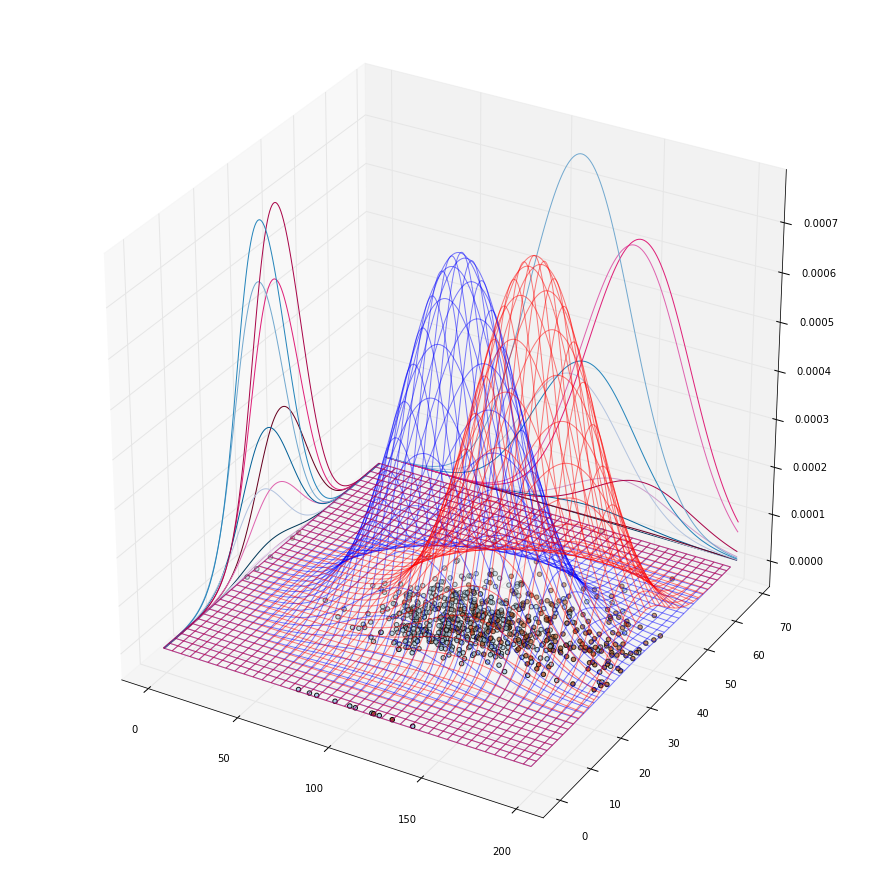

In [49]:
# Plot the decision boundary. For that, we will asign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X.min()[0] - .5, X.max()[0] + .5
y_min, y_max = X.min()[1] - .5, X.max()[1] + .5
x_grid = np.linspace(x_min, x_max, 200)
y_grid = np.linspace(y_min, y_max, 200)
xx, yy = np.meshgrid(x_grid, y_grid)
Zplus = np.array([norm_pdf_multivariate(np.matrix(xvec).T,plus_mean_vector,covar) for xvec in np.c_[xx.ravel(), yy.ravel()]])
Zminus = np.array([norm_pdf_multivariate(np.matrix(xvec).T,minus_mean_vector,covar) for xvec in np.c_[xx.ravel(), yy.ravel()]])
# Put the result into a color plot
Zplus = Zplus.reshape(xx.shape)
Zminus = Zminus.reshape(xx.shape)

from mpl_toolkits.mplot3d import axes3d, Axes3D
fig = pl.figure(figsize=(12,12))
ax = Axes3D(fig)
ax.plot_wireframe(xx, yy, Zplus, rstride=5, cstride=5,alpha=0.5,color='red')
ax.plot_wireframe(xx, yy, Zminus, rstride=5, cstride=5,alpha=0.5)
#ax.plot_surface(xx, yy, Zplus, rstride=5, cstride=5,alpha=0.1,color='red')
#ax.plot_surface(xx, yy, Zminus, rstride=5, cstride=5,alpha=0.1)
#cset = ax.contour(xx, yy, Zequal, levels=[1], zdir='z', offset=0, cmap=cm.PuRd)
cset = ax.contour(xx, yy, Zplus, zdir='x', offset=0, cmap=cm.PuRd)
cset = ax.contour(xx, yy, Zplus, zdir='y', offset=70, cmap=cm.PuRd)
#cset = ax.contour(xx, yy, Zequal,levels=[1], zdir='z', offset=0, cmap=cm.PuBu)
cset = ax.contour(xx, yy, Zminus, zdir='x', offset=0, cmap=cm.PuBu)
cset = ax.contour(xx, yy, Zminus, zdir='y', offset=70, cmap=cm.PuBu)
#pl.pcolormesh(xx, yy, Z, cmap=pl.cm.Paired,zdir='z')
pl.scatter(X['ogtt'], X['BMI'], c=Y, edgecolors='k', cmap=pl.cm.Paired,zdir='z')

### K Nearest Neighbors (KNN)


In KNN,

* The $k$ closest neigbors *vote* for their class.
* The class that wins the vote is the predicted label.

<img src="http://bdewilde.github.io/assets/images/2012-10-26-knn-concept.png" width:"500">

In [ ]:
import numpy as np
import pylab as pl

# We need the X matrix to be 2D, but DON'T need to include a column of 1's
X = data[['ogtt','BMI']]
# The Y vector must be 1D
Y = data['class']


# Plot also the training points
pl.scatter(X['ogtt'], X['BMI'], c=Y, edgecolors='k', cmap=pl.cm.Paired,s=100)
pl.scatter([100],[40])
pl.xlabel('OGTT')
pl.ylabel('BMI')
pl.xlim(95,105)
pl.ylim(35,45)
pl.title("A neighborhood of Points")

In [ ]:
import numpy as np
import pylab as pl
from sklearn import neighbors

n_neighbors = 5
#We can use 'uniform' or 'distance'
wts = 'uniform'


# We need the X matrix to be 2D, but DON'T need to include a column of 1's
X = data[['ogtt','BMI']]
# The Y vector must be 1D
Y = data['class']


clf = neighbors.KNeighborsClassifier(n_neighbors, weights=wts)
clf.fit(X, Y)

# Plot the decision boundary. For that, we will asign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X.min()[0] - .5, X.max()[0] + .5
y_min, y_max = X.min()[1] - .5, X.max()[1] + .5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
pl.figure(1, figsize=(16, 12))
pl.pcolormesh(xx, yy, Z, cmap=pl.cm.Paired)

# Plot also the training points
pl.scatter(X['ogtt'], X['BMI'], c=Y, edgecolors='k', cmap=pl.cm.Paired)
pl.xlabel('OGTT')
pl.ylabel('BMI')
pl.title("KNN on a 2D Problem.")

<STYLE>H1 {FONT-SIZE: 21pt; COLOR:red}</STYLE>
<H1>Homework Exercise 3</H1>

1. Fit and plot the decision regions for KNN using BMI and blood pressure as the only features.
2. Fit and plot the decision regions for KNN for three more pairs of features.